# 3. Community detection
This notebook examines the community structures of the artist graph and visualizes the communities.

## Possible approaches for community detection
* Standard clustering algorithm: If one is given a distance among nodes, one can apply standard clustering methods. This may be an appropriate tool after we find vector representations of the nodes. For now, we'll consider algorithms that use the network structure rather than distances. 
* Girvan-Newman algorithm: Girvan-Newman algorithm detects communities by progressively removing edges from the original network. This algorithm is computationally infeasible for graphs with more than a few thousand nodes. 
* Louvian clustering: While much faster than Girvan-Newman algorithm, Louvian clustering can lead to arbitrarily bad connected communities. 
* <b>Leiden clustering</b>: An extension of the Louvian clustering. It's fast, and it resolves the problem of arbitrarily bad communities. 

## Summary
* I used the Leiden method since it is fast, reliable, and doesn't require the notion of distance between nodes.
* The big communities are largely based on era, nationality/region, and genre. For example, the algorithm found a community of Baroque composers, a community of German composers and performers, and a community of opera composers and singers.

In [ ]:
import igraph as ig
import leidenalg as la
import pickle
from IPython.display import Image
from musicians import *

## (a) Community detection via Leiden algorithm

In [2]:
### load data
# read graph as igraph
Gix = ig.read('graph_80000/graph.gml', format="gml")

# get weights
weights = Gix.es["weight"]

# load ID:name dictionary
with open('graph_80000/ID_name.pkl', 'rb') as f:
    ID_name = pickle.load(f)

In [3]:
# load partition result via Leiden algorithm
with open("graph_80000/Leiden_partition.txt", "rb") as f:
    partition = pickle.load(f)
print('number of clusters: ', len(set(partition)))

# To run Leiden algorithm, do the following:
# partition = la.find_partition(Gix, la.ModularityVertexPartition, weights = weights)
# partition = partition._membership

number of clusters:  960



### Examine clusters
The function `community_members` in `musicians.py` returns 20 artists that have the highest degree in a selected community.

Cluster 0 consists of Baroque composers. 

In [4]:
community_members(Gix, partition, 0, ID_name)

Artists with maximum degree in community 0
Johann Sebastian Bach
George Frideric Handel
Anonymous
Antonio Vivaldi
Henry Purcell
Georg Philipp Telemann
Claudio Monteverdi
Carl Philipp Emanuel Bach
Heinrich Schütz
Alessandro Scarlatti
Max Reger
Arcangelo Corelli
Jean-Philippe Rameau
Giovanni Battista Pergolesi
Michael Praetorius
Domenico Scarlatti
Tomaso Albinoni
François Couperin
Marc-Antoine Charpentier
Dietrich Buxtehude


Cluster 1 consists of one of the most 'classic' composers

In [5]:
community_members(Gix, partition, 1, ID_name)

Artists with maximum degree in community 1
Wolfgang Amadeus Mozart
Ludwig van Beethoven
Franz Schubert
Johannes Brahms
Pyotr Ilyich Tchaikovsky
Felix Mendelssohn
Robert Schumann
Franz Joseph Haydn
Camille Saint-Saëns
Antonín Dvořák
Maurice Ravel
Sergei Rachmaninoff
Frédéric Chopin
Franz Liszt
Benjamin Britten
Edvard Grieg
Dmitri Shostakovich
Igor Stravinsky
Sergei Prokofiev
Hector Berlioz


To be honest, I'm a bit confused about cluster 2. It contains some choral music composers and performers (John Rutter, Choir of King's College, David Willcocks), and Renaissance composer (William Byrd, Giovanni Pierluigi da Palestrina). One could also consider cluster 2 as a group of English / American composers.

In [6]:
community_members(Gix, partition, 2, ID_name)

Artists with maximum degree in community 2
Traditional
Unknown Artist
Anonymous 
Gustav Holst
Franz Xaver Gruber
John Rutter
William Byrd
Percy Grainger
Herbert Howells
Giovanni Pierluigi da Palestrina
Irving Berlin
Choir of King's College, Cambridge
Charles Villiers Stanford
John Williams
Hubert Parry
Sir David Willcocks
Orlando Gibbons
Maurice Duruflé
Bryn Terfel
John Philip Sousa


Cluster 3 mostly consists of French composers and artists

In [8]:
community_members(Gix, partition, 3, ID_name)

Artists with maximum degree in community 3
Claude Debussy
Gabriel Fauré
Francis Poulenc
Arnold Schoenberg
Darius Milhaud
Olivier Messiaen
Erik Satie
Arthur Honegger
Reynaldo Hahn
Jacques Ibert
L'Orchestre de la Suisse Romande
Emmanuel Chabrier
SWR Symphony Orchestra
Albert Roussel
Pierre Boulez
Jean Françaix
Orchestre National De France
Orchestre De La Société Des Concerts Du Conservatoire
André Cluytens
André Jolivet


Cluster 4 mostly consists of German composers and musicians

In [7]:
community_members(Gix, partition, 4, ID_name)

Artists with maximum degree in community 4
Richard Wagner
Richard Strauss
Johann Strauss II
Gustav Mahler
Franz Lehár
Carl Maria von Weber
Wiener Philharmoniker
Munich Radio Orchestra
Vienna State Opera Orchestra
Bavarian Radio Chorus
Vienna State Opera Chorus
Bavarian Radio Symphony Orchestra
Berliner Philharmoniker
Anton Bruckner
Carl Orff
Dietrich Fischer-Dieskau
Alban Berg
Wiener Symphoniker
Herbert von Karajan
Nicolai Gedda


Cluster 5 largely consists of singers composers known for their opera.

In [9]:
community_members(Gix, partition, 5, ID_name)

Artists with maximum degree in community 5
Giuseppe Verdi
Giacomo Puccini
Gioachino Rossini
Georges Bizet
Gaetano Donizetti
Charles Gounod
Jules Massenet
Jacques Offenbach
Vincenzo Bellini
Pietro Mascagni
Ruggero Leoncavallo
Christoph Willibald Gluck
Giacomo Meyerbeer
Various Artists
Umberto Giordano
Studio Orchestra
Léo Delibes
Amilcare Ponchielli
Ambroise Thomas
Plácido Domingo


Cluster 6 was interesting. It shows that our graph generating process managed to find non-classical artists. This is expected, since many orchestras do have collaborative albums with pop artists. Cluster 6 seems to contain mostly American non-classical musicians, including jazz artists and rappers.

In [10]:
community_members(Gix, partition, 6, ID_name)

Artists with maximum degree in community 6
Duke Ellington
Michel Legrand
Snoop Dogg
Freeway
Bing Crosby
Antônio Carlos Jobim
Hoagy Carmichael
Hans Zimmer
Louis Armstrong
Dave Lee
Quincy Jones
Jeezy
Busta Rhymes
Engelbert Humperdinck
Twista
Paolo Fresu
Michel Godard
Chick Corea
Wynton Marsalis
Wale


## (b) Community visualization
* I used [Gephi](https://gephi.org/) to visualize my musician graph and communities.
* This section prepares the `.gml` file for the Gephi software.
* Because the musician graph is quite large, I decided to include only the nodes (artists) with a high enough degree (collaborators) for visualization purposes.

In [11]:
# store community membership of each node 
for i in range(len(partition)):
    Gix.vs[i]["community"] = partition[i]

Select artists with high degree

In [12]:
# select minimum degree of nodes to include
min_degree = 100
delete_idx = [v.index for v in Gix.vs if v.degree() <= min_degree]
print("number of nodes to remove: ", len(delete_idx))

number of nodes to remove:  184791


In [13]:
# delete nodes with low degree
Gix.delete_vertices(delete_idx)
print("Remaining number nodes: ", len(Gix.vs))

Remaining number nodes:  3503


Replace Spotify ID of each node with artist name.

In [14]:
# change label of nodes to be artists' names
for v in Gix.vs:
    v["label"] = ID_name[v["label"]]

In [10]:
# save 
#Gix.save("graph_80000/graph_visualization/graph_3503.gml")

To visualize the graph, one should download Gephi and open the `.gml` file. Here is an example visualization of the graph:


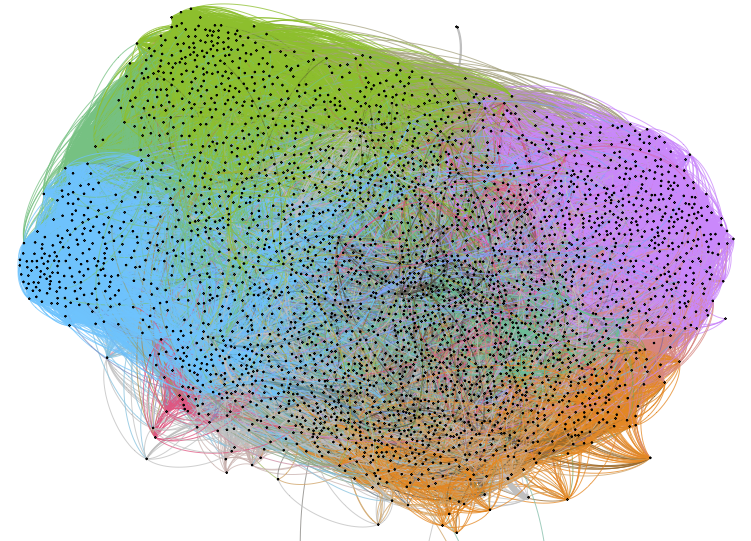

In [15]:
Image(filename='graph_80000/graph_visualization/graph_3503.png')

The <span style="background-color: #de89fe">pink community</span> (top right) consists of Baroque composers such as Johann Sebastian Bach and George Frideric Handel. The <span style="background-color: #75bf08">green community</span> consists of German and Austrian composers and performers, such as Richard Wagner, Richard Strauss, Berliner Philharmoniker, and Wiener Philharmoniker. The <span style="background-color: #0ac2fd">blue community</span> consists of various opera composers and singers, such as Giuseppe Verdi, Giacomo Puccini, and Plácido Domingo. The <span style="background-color: #fd8f1e">orange community</span> consists of various English and American composers, such as Gustav Holst and John Williams. The <span style="background-color: #f5618d">pink community</span> (bottom left) consists of French artists, such as Claude Debussy, Gabriel Fauré and Orchestre National De France. 

What's interesting about this graph is that some of the most classic composers, such as Wolfgang Amadeus Mozart, Ludwig van Beethoven, Franz Schubert, and Johannes Brahms, belong to a community of their own, but because the work of these artists are performed so widely, it's difficult to visually identify the community of these composers in the graph above.


## Summary
The big communities are largely based on era, nationality/region, and genre. 